In [130]:
%pip install decorator==5.0.9

import networkx as nx
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [131]:
import imp
import sys

sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import similarities.cosine as thesisCosineSimilarity

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisCosineSimilarity)

<module 'similarities.cosine' from '../src/similarities/cosine.py'>

In [132]:
a_zwickau_text = thesisDataReader.read_zwickau()
b_london_text = thesisDataReader.read_london()

In [133]:
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))
b_london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(b_london_text))

In [134]:
# thesisCosineSimilarity.create_version_to_version_comparison_csv(
#     '5gram_london_to_zwickau', 
#     b_london_corpus,
#     'london',
#     a_zwickau_corpus,
#     'zwickau'
# )

In [135]:
# thesisCosineSimilarity.create_version_to_version_5_gram_comparison_csv(
#     '5gram_zwickau_to_london', 
#     a_zwickau_corpus,
#     'zwickau',
#     b_london_corpus,
#     'london'
# )

In [136]:
def create_comparison_df(
    version_1_name, 
    version_2_name,
    version_1_to_self_best_similarities,
    version_1_to_version_2_best_similarities,
    version_1_same_or_different
):
    data_frame_data = []
    data_frame_cols = [
        f'similar p in {version_2_name}',
        f'similarity score for {version_2_name}',
        'similar p in self', 
        'similarity score for self',
        'same or different'
    ]
    
    for i, d_inner in enumerate(version_1_to_self_best_similarities['5_gram']):
        d_cross = version_1_to_version_2_best_similarities[i]['5_gram']
        
        inner_score = d_inner[1]
        cross_score = d_cross[1]
        
        p_inner = d_inner[0]
        p_cross = d_cross[0]
        
        data = [
            p_cross,
            cross_score,
            p_inner,
            inner_score,
            version_1_same_or_different[i]
        ]
        data_frame_data.append(data)
        
    return pd.DataFrame(data=data_frame_data, columns=data_frame_cols)

In [137]:
def show_stats(similarity):
    np_similarities_arr = np.array([similarity for p, similarity in similarity])
    print(f'median: {np.median(np_similarities_arr)}')
    print(f'average: {np.average(np_similarities_arr)}')
    print(f'mean: {np.mean(np_similarities_arr)}')
    print(f'std: {np.std(np_similarities_arr)}')
    print(f'range of values (ptp): {np.ptp(np_similarities_arr)}')
    print(f'percentile [10, 20, 30, 40, 50, 75, 90, 95]: {np.percentile(np_similarities_arr, [10, 20, 30, 40, 50, 75, 90, 95])}')

In [47]:
# zwickau_different_indexes = [x for x in [i if d == 'Different' else None for i, d in enumerate(zwickau_same_or_different)] if x is not None]
# len(different_indexes)

In [138]:
london_to_zwickau_best_similarities = thesisCosineSimilarity.london_to_zwickau_best_similarities()
london_with_self_best_similarities = thesisCosineSimilarity.get_london_with_self_best_similarities()
show_stats(london_with_self_best_similarities['5_gram'])
london_same_or_different = ["Different" if similarity < 0.12802877 else "Same" for p, similarity in london_with_self_best_similarities['5_gram']]

median: 0.15400405978256626
average: 0.16490710032838926
mean: 0.16490710032838926
std: 0.06160256721945463
range of values (ptp): 0.36039278467975033
percentile [10, 20, 30, 40, 50, 75, 90, 95]: [0.10313227 0.11630757 0.12802877 0.13956912 0.15400406 0.19002412
 0.23858081 0.29301356]


In [139]:
zwickau_to_london_best_similarities = thesisCosineSimilarity.zwickau_to_london_best_similarities()
zwickau_with_self_best_similarities = thesisCosineSimilarity.get_zwickau_with_self_best_similarities()
show_stats(zwickau_with_self_best_similarities['5_gram'])
zwickau_same_or_different = ["Different" if similarity < 0.12847637 else "Same" for p, similarity in zwickau_with_self_best_similarities['5_gram']]

median: 0.1504093192409572
average: 0.1671506360655053
mean: 0.1671506360655053
std: 0.06446782207702421
range of values (ptp): 0.35203106137840795
percentile [10, 20, 30, 40, 50, 75, 90, 95]: [0.10192626 0.11622983 0.12847637 0.14338879 0.15040932 0.19925208
 0.25850441 0.28306982]


In [16]:
create_comparison_df(
    'london', 
    'zwickau', 
    london_with_self_best_similarities, 
    london_to_zwickau_best_similarities,
    london_same_or_different
)

,similar p in zwickau,similarity score for zwickau,similar p in self,similarity score for self,same or different
0,218,0.094136,19,0.102028,Different
1,1,0.782960,275,0.084624,Different
2,2,0.897529,220,0.079059,Different
3,3,0.862209,5,0.109075,Different
4,4,0.789200,271,0.102376,Different
...,...,...,...,...,...
313,297,0.175417,289,0.175932,Same
314,115,0.214930,315,0.430161,Same
315,115,0.199030,314,0.430161,Same
316,115,0.098014,314,0.185964,Same


In [17]:
create_comparison_df(
    'zwickau', 
    'london', 
    zwickau_with_self_best_similarities, 
    zwickau_to_london_best_similarities,
    zwickau_same_or_different
)

,similar p in london,similarity score for london,similar p in self,similarity score for self,same or different
0,8,0.160069,321,0.148716,Same
1,1,0.783606,6,0.103347,Different
2,2,0.896927,212,0.097735,Different
3,3,0.860358,5,0.103975,Different
4,4,0.785025,283,0.107332,Different
...,...,...,...,...,...
317,309,0.895254,252,0.120139,Different
318,310,0.842503,313,0.131941,Same
319,311,0.810284,123,0.108028,Different
320,312,0.797168,297,0.067314,Different


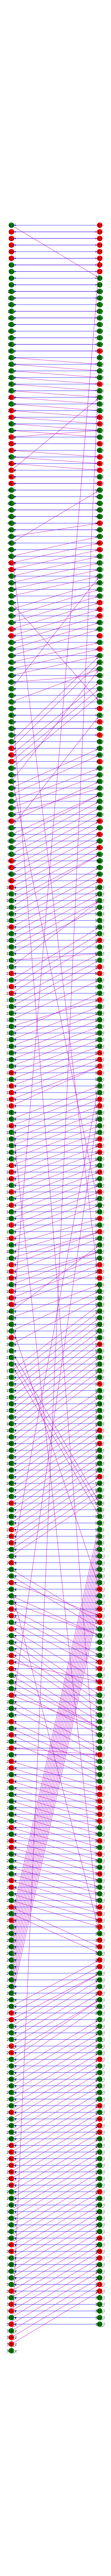

In [114]:
B = nx.DiGraph()

zwickau_p_nodes = list(map(lambda x: f'{x}_z', list(range(0, len(thesisDataReader.get_zwickau_corpus())))))
london_p_nodes = list(map(lambda x: f'{x}_l', list(range(0, len(thesisDataReader.get_london_corpus())))))

for i, node in enumerate(zwickau_p_nodes):
    color = 'green' if zwickau_same_or_different[i] == 'Same' else 'red'
    B.add_node(node, pos=(1, len(zwickau_p_nodes) - i), color=color)
    
for i, node in enumerate(london_p_nodes):
    color = 'green' if london_same_or_different[i] == 'Same' else 'red'
    B.add_node(node, pos=(2, 4 + len(london_p_nodes) - i), color=color)
    
# edges = []
for i, d in enumerate(zwickau_to_london_best_similarities):
#     edges.append((f'{i}_z', f'{d["5_gram"][0]}_l', color='y'))
    B.add_edge(f'{i}_z', f'{d["5_gram"][0]}_l', color='m')
for i, d in enumerate(london_to_zwickau_best_similarities):
    B.add_edge(f'{i}_l', f'{i}_z', color='b')
#     edges.append((f'{i}_l', f'{i}_z', color='r'))
B.add_edges_from(edges)

default_color = 'blue'
colored_dict = nx.get_node_attributes(B, 'color')
color_seq = [colored_dict.get(node, default_color) for node in B.nodes()]

edge_colors = nx.get_edge_attributes(B,'color').values()

pos=nx.get_node_attributes(B,'pos')
plt.figure(figsize=(5, 120)) 
nx.draw(B,pos, with_labels=True, node_color=color_seq, edge_color=edge_colors)

In [116]:
nx.get_node_attributes(B, 'pos')

{'0_z': (1, 322),
 '1_z': (1, 321),
 '2_z': (1, 320),
 '3_z': (1, 319),
 '4_z': (1, 318),
 '5_z': (1, 317),
 '6_z': (1, 316),
 '7_z': (1, 315),
 '8_z': (1, 314),
 '9_z': (1, 313),
 '10_z': (1, 312),
 '11_z': (1, 311),
 '12_z': (1, 310),
 '13_z': (1, 309),
 '14_z': (1, 308),
 '15_z': (1, 307),
 '16_z': (1, 306),
 '17_z': (1, 305),
 '18_z': (1, 304),
 '19_z': (1, 303),
 '20_z': (1, 302),
 '21_z': (1, 301),
 '22_z': (1, 300),
 '23_z': (1, 299),
 '24_z': (1, 298),
 '25_z': (1, 297),
 '26_z': (1, 296),
 '27_z': (1, 295),
 '28_z': (1, 294),
 '29_z': (1, 293),
 '30_z': (1, 292),
 '31_z': (1, 291),
 '32_z': (1, 290),
 '33_z': (1, 289),
 '34_z': (1, 288),
 '35_z': (1, 287),
 '36_z': (1, 286),
 '37_z': (1, 285),
 '38_z': (1, 284),
 '39_z': (1, 283),
 '40_z': (1, 282),
 '41_z': (1, 281),
 '42_z': (1, 280),
 '43_z': (1, 279),
 '44_z': (1, 278),
 '45_z': (1, 277),
 '46_z': (1, 276),
 '47_z': (1, 275),
 '48_z': (1, 274),
 '49_z': (1, 273),
 '50_z': (1, 272),
 '51_z': (1, 271),
 '52_z': (1, 270),
 '5

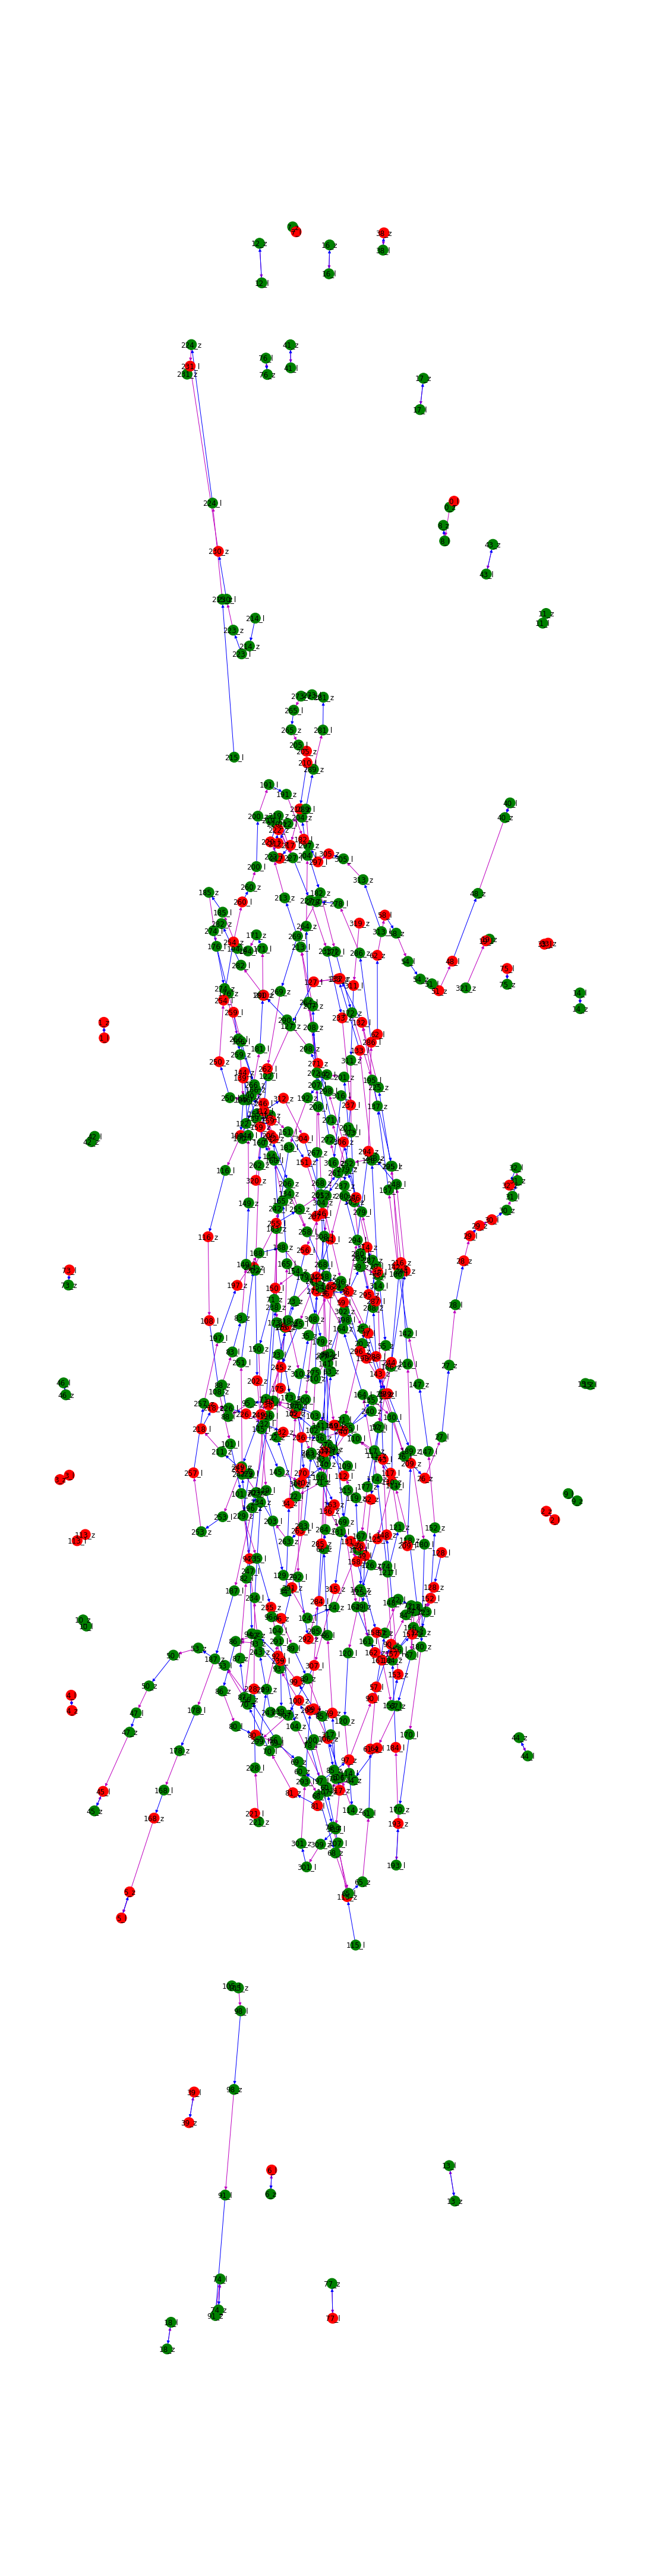

In [87]:
plt.figure(figsize=(15, 60)) 
nx.draw(B,with_labels=True, node_color=color_seq, edge_color=edge_colors)

In [128]:
F = nx.DiGraph()

zwickau_p_nodes = list(map(lambda x: f'{x}_z', list(range(0, len(thesisDataReader.get_zwickau_corpus())))))
london_p_nodes = list(map(lambda x: f'{x}_l', list(range(0, len(thesisDataReader.get_london_corpus())))))
 ge
for i, node in enumerate(zwickau_p_nodes):
    color = 'green' if zwickau_same_or_different[i] == 'Same' else 'red'
    F.add_node(node, X=1, Y=len(zwickau_p_nodes) - i, color=color)
    
for i, node in enumerate(london_p_nodes):
    color = 'blue' if london_same_or_different[i] == 'Same' else 'magenta'
    F.add_node(node, X=2, Y=4 + len(london_p_nodes) - i, color=color)

for i, d in enumerate(zwickau_to_london_best_similarities):
    F.add_edge(f'{i}_z', f'{d["5_gram"][0]}_l')
for i, d in enumerate(london_to_zwickau_best_similarities):
    F.add_edge(f'{i}_l', f'{i}_z')

# nx.readwrite.gexf.write_gexf(B, "test.gexf")

In [129]:
nx.readwrite.graphml.write_graphml(F, "test.graphml")

In [160]:
london_to_zwickau_5_gram = []
for d in london_to_zwickau_best_similarities:
    london_to_zwickau_5_gram.append(d['5_gram'][1])
    
zwickau_to_london_5_gram = []
for d in zwickau_to_london_best_similarities:
    zwickau_to_london_5_gram.append(d['5_gram'][1])

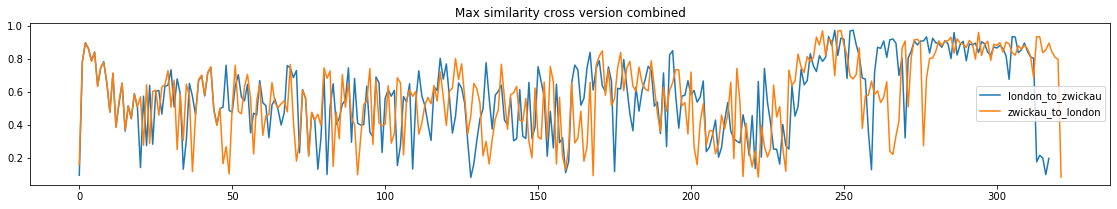

In [216]:
%matplotlib inline
# fig, ax = plt.subplots(figsize=(20, 5))
# fig, ax = plt.subplots(1, 1, figsize=(20, 5), tight_layout=True)
fig = plt.figure(figsize=(20, 3))
ax = fig.add_axes([0.1,0.1,0.75,0.75])
ax.plot(london_to_zwickau_5_gram, label="london_to_zwickau")
ax.plot(zwickau_to_london_5_gram, label="zwickau_to_london")
# ax.plot(b_london_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity cross version combined')
# plt.tight_layout(pad=0)
# plt.margins(0,0)
# plt.figure(tight_layout=True)
plt.savefig('../computed_data/images/5gram_max_similarity_cross_version_combined.jpg')
plt.show()

In [214]:
london_to_zwickau_5_gram_percentile = np.percentile(np.array(london_to_zwickau_5_gram), [10, 20, 30, 40, 50, 75, 90])
london_to_zwickau_5_gram_percentile

array([0.26213354, 0.35901634, 0.46549764, 0.53778688, 0.60696919,
       0.75882374, 0.88406522])

In [211]:
zwickau_to_london_5_gram_percentiles = np.percentile(np.array(zwickau_to_london_5_gram), [10, 20, 30, 40, 50, 75, 90])
zwickau_to_london_5_gram_percentiles

array([0.25689312, 0.36098967, 0.46008508, 0.53333789, 0.60178911,
       0.75291287, 0.88228722])

No handles with labels found to put in legend.


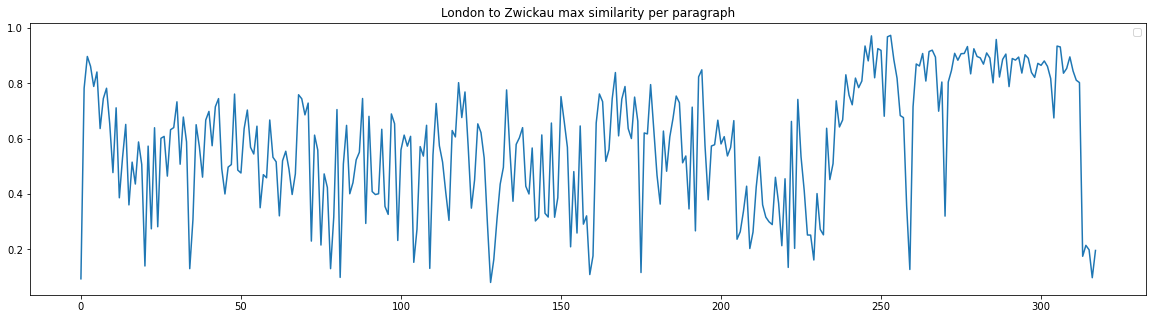

In [159]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(london_to_zwickau_5_gram)
# ax.plot(b_london_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('London to Zwickau max similarity per paragraph')
plt.show()

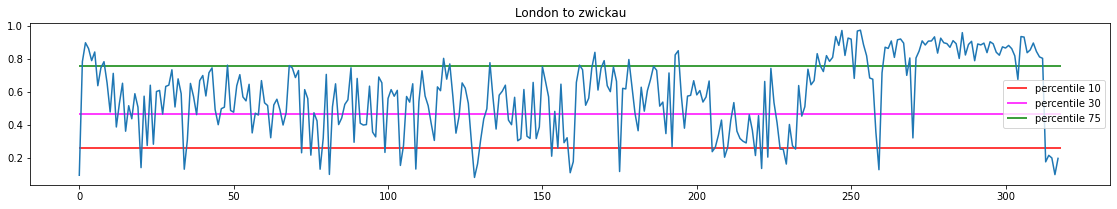

In [217]:
%matplotlib inline

fig = plt.figure(figsize=(20, 3))
ax = fig.add_axes([0.1,0.1,0.75,0.75])
ax.plot(london_to_zwickau_5_gram)
ax.hlines(y=london_to_zwickau_5_gram_percentile[0], xmin=0, xmax=len(london_to_zwickau_5_gram), colors='r', label='percentile 10')
ax.hlines(y=london_to_zwickau_5_gram_percentile[2], xmin=0, xmax=len(london_to_zwickau_5_gram), colors='magenta', label='percentile 30')
ax.hlines(y=london_to_zwickau_5_gram_percentile[5], xmin=0, xmax=len(london_to_zwickau_5_gram), colors='g', label='percentile 75')
ax.legend()
plt.title('London to zwickau')

plt.savefig('../computed_data/images/5gram_max_similarity_london_to_zwickau.jpg')
plt.show()

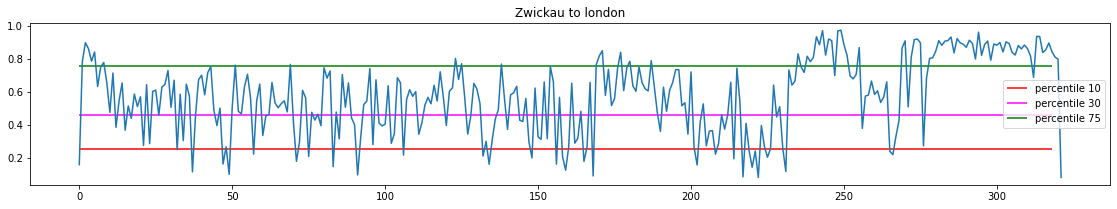

In [218]:
%matplotlib inline

fig = plt.figure(figsize=(20, 3))
ax = fig.add_axes([0.1,0.1,0.75,0.75])
ax.plot(zwickau_to_london_5_gram)
ax.hlines(y=zwickau_to_london_5_gram_percentiles[0], xmin=0, xmax=len(london_to_zwickau_5_gram), colors='r', label='percentile 10')
ax.hlines(y=zwickau_to_london_5_gram_percentiles[2], xmin=0, xmax=len(london_to_zwickau_5_gram), colors='magenta', label='percentile 30')
ax.hlines(y=zwickau_to_london_5_gram_percentiles[5], xmin=0, xmax=len(london_to_zwickau_5_gram), colors='g', label='percentile 75')
ax.legend()
plt.title('Zwickau to london')

plt.savefig('../computed_data/images/5gram_max_similarity_zwickau_to_london.jpg')
plt.show()

No handles with labels found to put in legend.


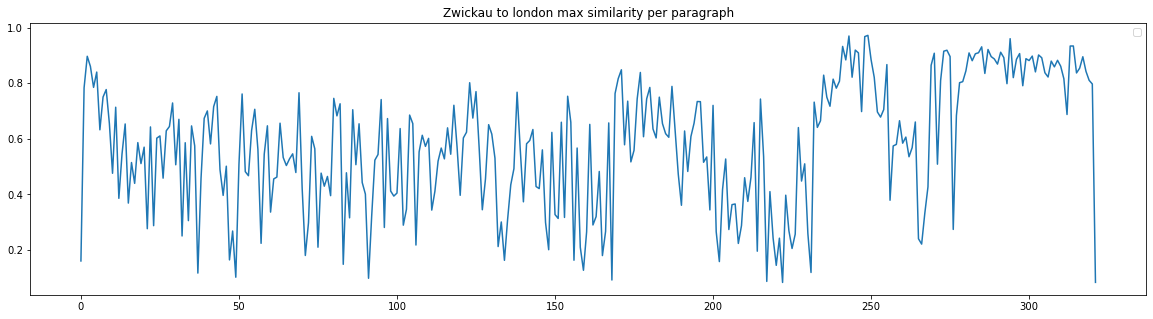

In [161]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(zwickau_to_london_5_gram)
# ax.plot(b_london_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Zwickau to london max similarity per paragraph')
plt.show()